# Lista 7

### Zaimplementowane biblioteki

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

### Zadanie 1

#### Metoda Eulera

(-0.006929173069746275, -0.0033257980697463108, -0.0016305323775587244)

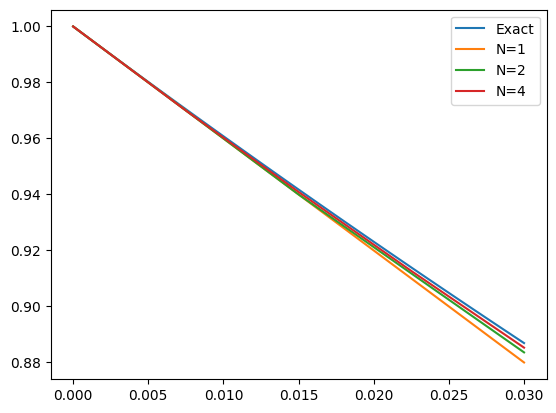

In [3]:
def f(x,y):
    return x**2-4*y

def exact(x):
    return 31/32*np.exp(-4*x) + 1/4*x**2 - 1/8*x + 1/32

def euler(f, x0, y0, xStop, n):
    h = (xStop-x0)/n
    xs = [x0]
    ys = [y0]
    for i in range(n):
        ys.append(ys[-1]+h*f(xs[-1], ys[-1]))
        xs.append(xs[-1]+h)
    return xs, ys

xs = np.linspace(0, 0.03, 100)
plt.plot(xs, exact(xs), label='Exact')
plt.plot(np.linspace(0,0.03,2), euler(f, 0, 1, 0.03, 1)[1], label='N=1')
plt.plot(np.linspace(0,0.03,3), euler(f, 0, 1, 0.03, 2)[1], label='N=2')
plt.plot(np.linspace(0,0.03,5), euler(f, 0, 1, 0.03, 4)[1], label='N=4')
plt.legend()
euler(f, 0, 1, 0.03, 1)[1][-1]-exact(0.03), euler(f, 0, 1, 0.03, 2)[1][-1]-exact(0.03), euler(f, 0, 1, 0.03, 4)[1][-1]-exact(0.03)

#### Metoda Runge-Kutta drugiego rzędu

(0.0002775769302537645, 6.635407400379378e-05, 1.622151381408532e-05)

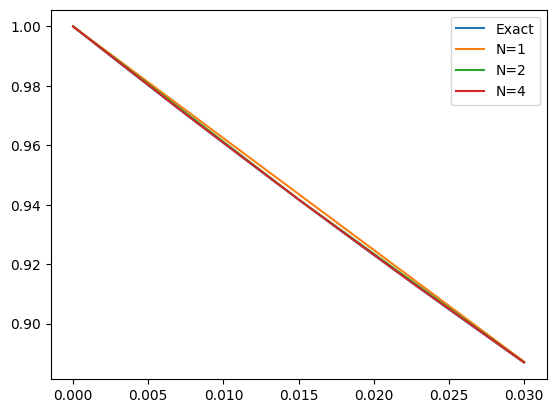

In [4]:
def soRungeKutta(f, x0, y0, xStop, n):
    h = (xStop-x0)/n
    xs = [x0]
    ys = [y0]
    for i in range(n):
        k1 = h*f(xs[-1], ys[-1])
        k2 = h*f(xs[-1]+h/2, ys[-1]+k1/2)
        ys.append(ys[-1]+k2)
        xs.append(xs[-1]+h)
    return xs, ys

plt.plot(xs, exact(xs), label='Exact')
plt.plot(np.linspace(0,0.03,2), soRungeKutta(f, 0, 1, 0.03, 1)[1], label='N=1')
plt.plot(np.linspace(0,0.03,3), soRungeKutta(f, 0, 1, 0.03, 2)[1], label='N=2')
plt.plot(np.linspace(0,0.03,5), soRungeKutta(f, 0, 1, 0.03, 4)[1], label='N=4')
plt.legend()
soRungeKutta(f, 0, 1, 0.03, 1)[1][-1]-exact(0.03), soRungeKutta(f, 0, 1, 0.03, 2)[1][-1]-exact(0.03), soRungeKutta(f, 0, 1, 0.03, 4)[1][-1]-exact(0.03)


#### Metoda Runge-Kutty czwartego rzędu


(2.0503025377482942e-07, 1.2198130394658335e-08, 7.438453186736638e-10)

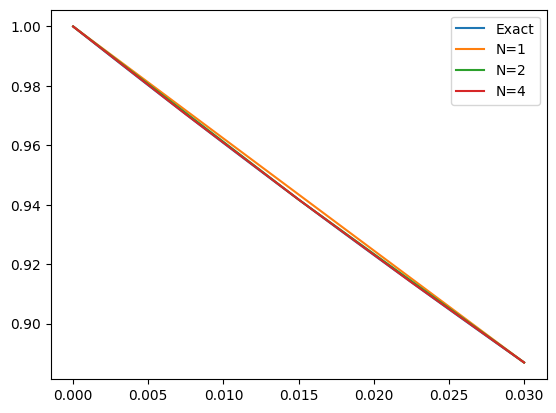

In [5]:
def foRungeKutta(f, x0, y0, xStop, n):
    h = (xStop-x0)/n
    xs = [x0]
    ys = [y0]
    for i in range(n):
        k1 = f(xs[-1], ys[-1])
        k2 = f(xs[-1]+h/2, ys[-1]+h*k1/2)
        k3 = f(xs[-1]+h/2, ys[-1]+h*k2/2)
        k4 = f(xs[-1]+h, ys[-1]+h*k3)
        ys.append(ys[-1] + h*(k1+2*k2+2*k3+k4)/6)
        xs.append(xs[-1]+h)
    return xs, ys

plt.plot(xs, exact(xs), label='Exact')
plt.plot(np.linspace(0,0.03,2), foRungeKutta(f, 0, 1, 0.03, 1)[1], label='N=1')
plt.plot(np.linspace(0,0.03,3), foRungeKutta(f, 0, 1, 0.03, 2)[1], label='N=2')
plt.plot(np.linspace(0,0.03,5), foRungeKutta(f, 0, 1, 0.03, 4)[1], label='N=4')
plt.legend()
foRungeKutta(f, 0, 1, 0.03, 1)[1][-1]-exact(0.03), foRungeKutta(f, 0, 1, 0.03, 2)[1][-1]-exact(0.03), foRungeKutta(f, 0, 1, 0.03, 4)[1][-1]-exact(0.03)

### Zadanie 2

0.49139596898495935
0.49999940636841594


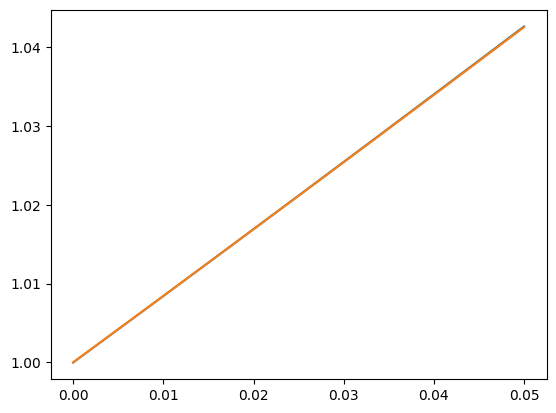

In [6]:
def f(x,y):
    return np.sin(y)

y0, y1  = euler(f, 0, 1, 0.5, 5)[1][-1], foRungeKutta(f, 0, 1, 0.5, 5)[1][-1]
plt.plot(np.linspace(0,0.05,7), foRungeKutta(f, 0, 1, 0.05, 6)[1], label='N=4')
plt.plot(np.linspace(0,0.05,7), euler(f, 0, 1, 0.05, 6)[1], label='N=4')
print(np.log(1/np.sin(y0) - 1/np.tan(y0)) + 0.604582)
print(np.log(1/np.sin(y1) - 1/np.tan(y1)) + 0.604582)

### Zadanie 3

In [10]:
def function(t, y, Q, omegaHat, A):
    theta, omega = y
    return [omega, -1/Q * omega - np.sin(theta) + A*np.cos(omegaHat*t) ]



def foRungeKutta(t, y, Q, omegaHat, A, h):
    k1 = h*np.array(function(t, y, Q, omegaHat, A))
    k2 = h*np.array(function(t+h/2, y+k1/2, Q, omegaHat, A))
    k3 = h*np.array(function(t+h/2, y+k2/2, Q, omegaHat, A))
    k4 = h*np.array(function(t+h, y+k3, Q, omegaHat, A))
    return y + (k1 + 2*k2+ 2*k3 + k4)/6

#### $Q=2, \hat{\omega} = \frac{2}{3}, \hat{A} = 0.5, \hat{v}_{0} = 0, \theta_{0} = 0.01$

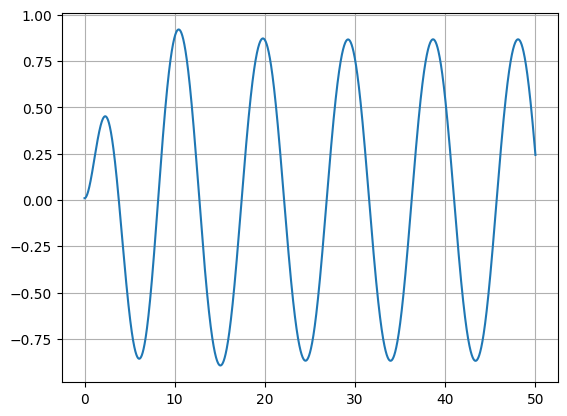

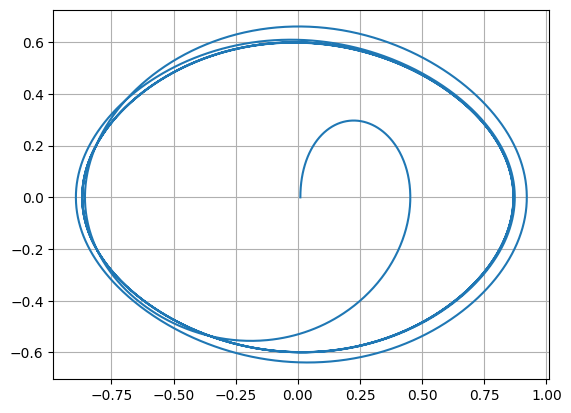

In [24]:
h = 0.01
tSpan = np.arange(0, 50+h, h)
Q=2
omegaHat = 2/3
A=0.5
v0 = 0
theta0 = 0.01
initCond = np.array([theta0, v0])

thetas = []
omegas = []

for t in tSpan:
    thetas.append(initCond[0])
    omegas.append(initCond[1])
    initCond = foRungeKutta(t, initCond, Q, omegaHat, A, h)

plt.plot(tSpan, thetas)
plt.grid()
plt.show()
plt.plot(thetas, omegas)
plt.grid()

#### $Q=2, \hat{\omega} = \frac{2}{3}, \hat{A} = 0.5, \hat{v}_{0} = 0, \theta_{0} = 0.03$

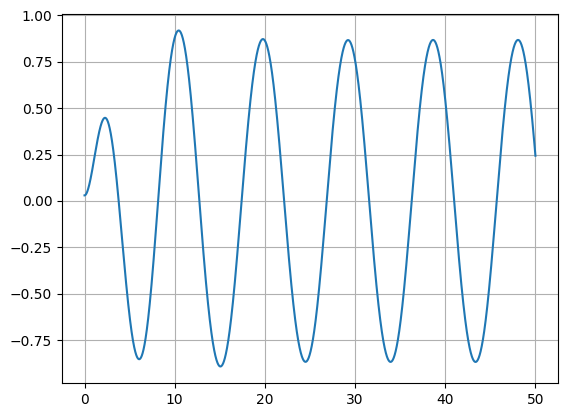

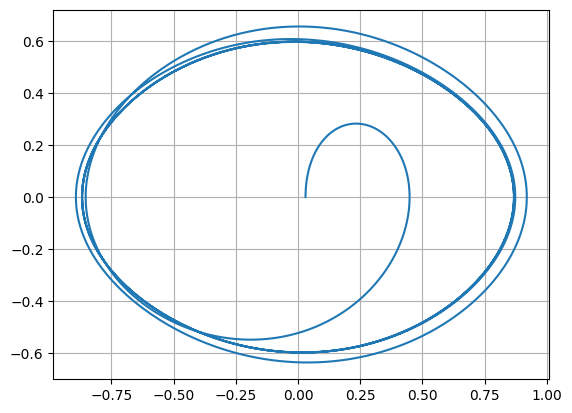

In [22]:
h = 0.01
tSpan = np.arange(0, 50+h, h)
Q=2
omegaHat = 2/3
A=0.5
v0 = 0
theta0 = 0.03
initCond = np.array([theta0, v0])

thetas = []
omegas = []

for t in tSpan:
    thetas.append(initCond[0])
    omegas.append(initCond[1])
    initCond = foRungeKutta(t, initCond, Q, omegaHat, A, h)

plt.plot(tSpan, thetas)
plt.grid()
plt.show()
plt.plot(thetas, omegas)
plt.grid()

#### $Q=2, \hat{\omega} = \frac{2}{3}, \hat{A} = 1.35, \hat{v}_{0} = 0, \theta_{0} = 0.03$

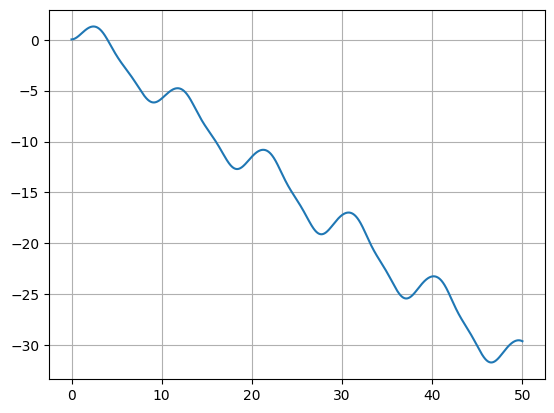

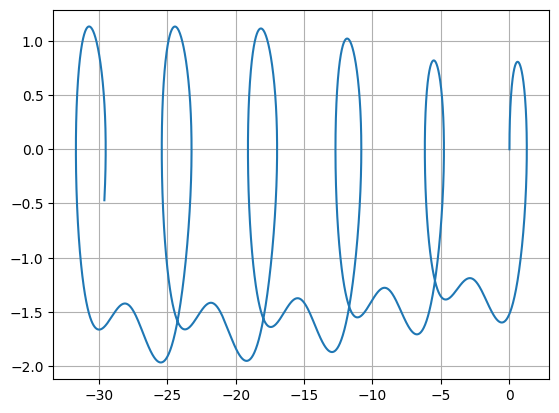

In [23]:
h = 0.01
tSpan = np.arange(0, 50+h, h)
Q=2
omegaHat = 2/3
A=1.35
v0 = 0
theta0 = 0.03
initCond = np.array([theta0, v0])

thetas = []
omegas = []

for t in tSpan:
    thetas.append(initCond[0])
    omegas.append(initCond[1])
    initCond = foRungeKutta(t, initCond, Q, omegaHat, A, h)

plt.plot(tSpan, thetas)
plt.grid()
plt.show()
plt.plot(thetas, omegas)
plt.grid()

### Zadanie 4

In [29]:
g = 9.81
def projectileMotionWithAirRes(t, state, c, ro, A):
    x, y, vx, vy = state
    velocity = np.sqrt(vx**2 + vy**2)
    dvdt = vx
    dydt = vy
    dvxdt = -1/2 *c*ro*A*velocity*vx
    dvydt = -g -1/2 *c*ro*A*velocity*vy
    return [dvdt, dydt, dvxdt, dvydt]

def projectileMotionWOAirRes(t, state):
    x, y, vx, vy = state
    dvdt = vx
    dydt = vy
    dvxdt = 0
    dvydt = -g
    return [dvdt, dydt, dvxdt, dvydt]


In [41]:
def foRungeKuttaAirRes(t, y, c, ro, A, h):
    k1 = h*np.array(projectileMotionWithAirRes(t, y, c, ro, A))
    k2 = h*np.array(projectileMotionWithAirRes(t+h/2, y+k1/2, c, ro, A))
    k3 = h*np.array(projectileMotionWithAirRes(t+h/2, y+k2/2, c, ro, A))
    k4 = h*np.array(projectileMotionWithAirRes(t+h, y+k3, c, ro, A))
    return y + (k1 + 2*k2+ 2*k3 + k4)/6

h = 0.01
tSpan = np.arange(0, 5+h, h)
c = 0.35
ro = 1.2
A = 0.1
state = np.array([0, 20, 20, 20])

trajectoryAirRes = []

for t in tSpan:
    trajectoryAirRes.append(state[:2])
    state = foRungeKuttaAirRes(t, state, c, ro, A, h)
trajectoryAirRes = np.array(trajectoryAirRes)


In [43]:
def foRungeKuttaWOAirRes(t, y, h):
    k1 = h*np.array(projectileMotionWOAirRes(t, y))
    k2 = h*np.array(projectileMotionWOAirRes(t+h/2, y+k1/2))
    k3 = h*np.array(projectileMotionWOAirRes(t+h/2, y+k2/2))
    k4 = h*np.array(projectileMotionWOAirRes(t+h, y+k3))
    return y + (k1 + 2*k2+ 2*k3 + k4)/6

h = 0.01
tSpan = np.arange(0, 5+h, h)
state = np.array([0, 20, 20, 20])

trajectoryWOAirRes = []

for t in tSpan:
    trajectoryWOAirRes.append(state[:2])
    state = foRungeKuttaWOAirRes(t, state, h)
trajectoryWOAirRes = np.array(trajectoryWOAirRes)

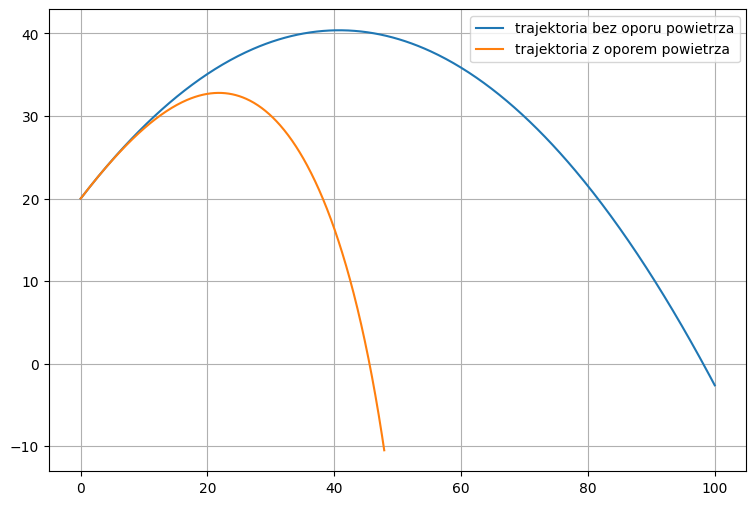

In [51]:
plt.figure(figsize=(9,6))
plt.plot(trajectoryWOAirRes[:,0], trajectoryWOAirRes[:,1], label='trajektoria bez oporu powietrza')
plt.plot(trajectoryAirRes[:,0], trajectoryAirRes[:,1], label='trajektoria z oporem powietrza')
plt.grid()
plt.legend()

### Zadanie 5

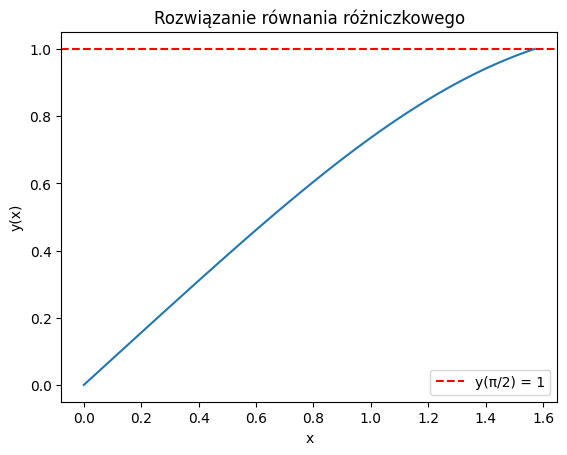

Początkowe przybliżenie y'(0): 1.0
Ostateczne rozwiązanie y'(0): 0.7788012295389286


In [2]:
def function(x, y):
    return [y[1], -1.0 * (1 - 0.2 * x) * y[0] ** 2]

def foRungeKutta(f, x0, xStop, y0, n):
    h = (xStop - x0)/n
    x = np.linspace(x0, xStop, n+1)
    y = np.zeros((len(y0), n+1))
    y[:, 0] = y0

    for i in range(n):
        k1 = h * np.array(f(x[i], y[:, i]))
        k2 = h * np.array(f(x[i] + 0.5*h, y[:, i] + 0.5*k1))
        k3 = h * np.array(f(x[i] + 0.5*h, y[:, i] + 0.5*k2))
        k4 = h * np.array(f(x[i] + h, y[:, i] + k3))
        y[:, i+1] = y[:, i] + (k1 + 2*k2 + 2*k3 + k4) / 6

    return x, y

def ridder_method(f, x0, xStop, tol=1e-6, max_iter=100):
    fa, fb = f(x0), f(xStop)
    if fa * fb > 0:
        raise ValueError("Funkcja nie zmienia znaku na końcach przedziału.")

    for i in range(max_iter):
        c = 0.5 * (x0 + xStop)
        fc = f(c)
        s = np.sqrt(fc**2 - fa*fb)
        if s == 0:
            return c
        dx = (c - x0) * fc / s
        if fa - fb < 0:
            dx = -dx
        x = c + dx
        fx = f(x)
        if fx == 0 or 0.5 * (xStop - x0) < tol:
            return x
        if np.sign(fx) == np.sign(fc):
            if np.sign(fa) != np.sign(fx):
                xStop, fb = x, fx
            else:
                x0, fa = x, fx
        else:
            x0, xStop, fa, fb = c, x, fc, fx

    raise ValueError("Metoda Riddera nie zbiega się po podanej liczbie iteracji.")

# Metoda strzałów
def shooting_method(y_prime_guess):
    x0, xStop = 0, np.pi/2
    n = 100
    y0 = [0, y_prime_guess]

    x, y = foRungeKutta(function, x0, xStop, y0, n)

    return y[0, -1] - 1

y_prime_guess = 1.0
y_prime_solution = ridder_method(shooting_method, 0, np.pi/2)
x, y_solution = foRungeKutta(function, 0, np.pi/2, [0, y_prime_solution], 100)

plt.plot(x, y_solution[0, :])
plt.axhline(y=1, color='r', linestyle='--', label='y(π/2) = 1')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Rozwiązanie równania różniczkowego')
plt.legend()
plt.show()
print("Początkowe przybliżenie y'(0):", y_prime_guess)
print("Ostateczne rozwiązanie y'(0):", y_prime_solution)